<div align="center">

# Нелинейное уменьшение размерности и визуализация

</div>

---


* **Цель**: упростить работу с многомерными данными — снизить число признаков при сохранении важной информации.
* **Линейные методы** (PCA, LDA): подходят для данных, где структура линейно разделима; часто неэффективны при наличии сложных (криволинейных) взаимосвязей.
* **Нелинейное уменьшение**: необходимо для задач с непростой геометрией данных, часто встречающихся в реальных задачах.

### Обучение на основе многообразий (Manifold Learning)

* **Многообразие**: гладкое вложение пространства низкой размерности в высокоразмерное.
* **Задача**: "раскатать" (embed) криволинейную структуру так, чтобы локальные (и иногда глобальные) отношения между точками сохранились.
* **Типичные методы**: Isomap, LLE, t-SNE и др.

### Алгоритм t-distributed Stochastic Neighbor Embedding (t-SNE)

1. **Основная идея**

   * Моделирует попарные сходства точек в исходном пространстве и в пространстве низкой размерности с помощью вероятностных распределений.
   * Стремится минимизировать расхождение (KL-дивергенцию) между этими двумя распределениями.

2. **Шаги алгоритма**

   1. **Построение матрицы сходства в исходном пространстве**:

      * Для каждой пары точек \$x\_i, x\_j\$ вычисляется условная вероятность \$p\_{j|i}\$, зависящая от гауссиана с локальной дисперсией (perplexity).
      * Итоговая симметризированная вероятность \$p\_{ij} = (p\_{j|i}+p\_{i|j})/(2N)\$.
   2. **Задание распределения в низкоразмерном пространстве**:

      * Используется распределение Стюдента с одной степенью свободы (t-распределение) для расчёта \$q\_{ij}\$, более сильно выделяющее удалённые точки.
   3. **Оптимизация**:

      * Минимизируется сумма \$KL(P | Q) = \sum\_{i\ne j} p\_{ij} \log\frac{p\_{ij}}{q\_{ij}}\$ градиентным спуском.

3. **Гиперпараметры**

   * **perplexity** (обычно от 5 до 50): влияет на локальный масштаб соседства.
   * **learning rate**: шаг оптимизации (часто 200–1000).
   * **число итераций**: от нескольких сотен до тысячи и более.

### Практические аспекты применения t-SNE

* **Визуализация**: чаще всего проекция в 2D или 3D для анализа кластеров и аномалий.
* **Ограничения**:

  * **Необщая модель** — нельзя «трансформировать» новые данные без полной переоценки.
  * **Чувствительность к гиперпараметрам** — требует перебора perplexity и learning rate.
  * **Аппаратные ресурсы** — при большом N вычисления становятся дорогими (квадратичная сложность).
* **Рекомендации**:

  * Предварительно уменьшить размерность линейным методом (PCA) до \~50 признаков.
  * Тщательно подбирать perplexity (экспериментировать в диапазоне).
  * Анализировать результаты не только визуально, но и количественно (например, по сохранению расстояний).

---

>t-SNE — мощный инструмент для визуализации сложных многомерных структур, но требует аккуратного обращения и понимания ограничений. При правильно подобранных гиперпараметрах и предварительной обработке данных он позволяет выявить скрытые закономерности и кластеры.



In [23]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np

In [24]:
# Загрузка изображений рукописных цифр с низким разрешением
digits = load_digits()

Цифры представлены в виде 8×8 изображений в градациях серого. Пример ниже показывает первые 4 из 1797 таких изображений.

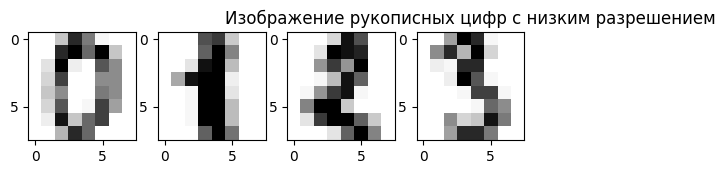

In [25]:
fig, ax = plt.subplots(1, 4)
plt.title('Изображение рукописных цифр с низким разрешением')
for i in range(4):
    ax[i].imshow(digits.images[i], cmap = 'Greys')
plt.show()

In [26]:
# Доступ к табличной версии этого набора данных
digits.data.shape

(1797, 64)

In [27]:
# Присвоим признаки (пикселы) новой переменной, а метки -
# другой новой переменной
X_digits = digits.data
y_digits = digits.target

In [28]:
# Преобразуем данные за один шаг с помощью объекта tsne
tsne = TSNE(n_components = 2, init = 'pca', 
            random_state = 123)
X_digits_tsne = tsne.fit_transform(X_digits)

После выполнения кода данные из 64-мерного пространства были проецированы в двумерное с помощью **t-SNE**. В параметре `init='pca'` указано, что начальное размещение точек для **t-SNE** задаётся методом главных компонент (PCA), как рекомендовано в работе Ван дер Маатена и Хинтона.

Хотя в примере использованы значения гиперпараметров по умолчанию (например, `perplexity` и `learning_rate`), в реальных задачах стоит подбирать их вручную для достижения лучших результатов.

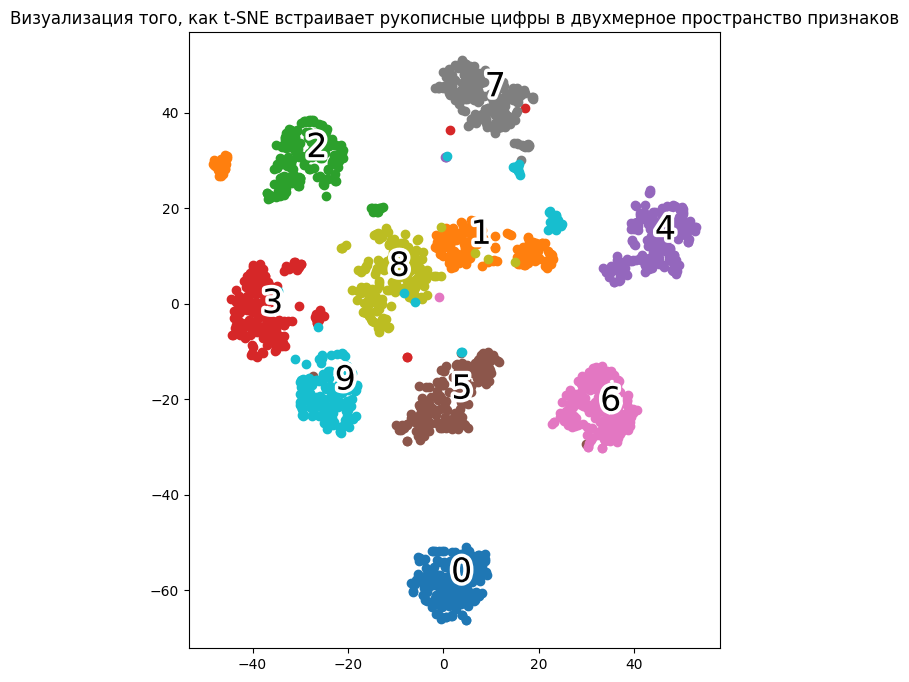

In [31]:
# Визуализация 2D-встраивания t-SNE
def plot_projection(x, colors):
    f = plt.figure(figsize = (8, 8))
    ax = plt.subplot(aspect = 'equal')

    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth = 5, foreground = "w"),
            PathEffects.Normal()])
        
plot_projection(X_digits_tsne, y_digits)
plt.title("Визуализация того, как t-SNE встраивает рукописные цифры в двухмерное пространство признаков")
plt.show()

Метки классов (цифры 0–9) использовались только для раскраски результата визуализации.
Для удобочитаемости на графике применён `PathEffects` из Matplotlib: внутри каждого кластера отображается средняя метка класса (расчёт через `np.median`).

* **Результат**:

  * Различные цифры в целом хорошо разделяются, но полностью избежать смешения не удаётся из-за неоднозначности рукописного почерка (например, некоторые «3» визуально напоминают «9»).
 

* **Возможности улучшения**:

  * Подбор гиперпараметров (learning rate, perplexity и т. д.) для более чёткого разделения кластеров.

---

### UMAP (Uniform Manifold Approximation and Projection)

* **Тип метода**: Нелинейное, без учителя
* **Цель**: Быстрая и качественная визуализация/уменьшение размерности с сохранением глобальной и локальной структуры данных
* **Преимущества перед t-SNE**:

  * Обычно работает быстрее.
  * Позволяет «трансформировать» (проецировать) новые образцы без повторного обучения на всём датасете.
* **Применение**: Аналогично t-SNE, используется для дву- или трёхмерной визуализации высокоразмерных признаков.

---

### Выводы и связка с предыдущими методами

* **PCA (Principal Component Analysis)**

  * **Тип**: Линейное, без учителя
  * **Задача**: Проекция на подпространство, максимизирующее дисперсию вдоль ортогональных компонент.
  * **Особенность**: Не учитывает метки классов.

* **LDA (Linear Discriminant Analysis)**

  * **Тип**: Линейное, с учителем
  * **Задача**: Проекция с учётом меток, максимизирующая разделимость классов.

* **t-SNE и UMAP**

  * **Тип**: Нелинейные, без учителя
  * **Задача**: Визуализация сложных распределений, выявление кластеров, исследование локальных и глобальных взаимосвязей.
  * **Отличие от PCA/LDA**: Способны обнаруживать и отображать сложные, «извилистые» многообразия в данных.

---

### Подготовка к дальнейшему изучению

Вооружившись PCA и LDA в качестве методов линейного снижения размерности, а также t-SNE и UMAP для нелинейной визуализации, вы готовы перейти к практикам:

* Предобработка данных (нормализация, кодирование категориальных признаков и т. п.)
* Оценка качества и стабильности моделей
* Подбор гиперпараметров и кросс-валидация

Этот набор инструментов обеспечит надёжную основу для эффективного извлечения признаков и анализа высокоразмерных данных.